In [27]:
import os, sys, glob, csv, datetime
import pandas as pd
import numpy as np
import tifffile as tif
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [26]:
this_folder = os.path.dirname(os.path.abspath('__file__'))
print('you are in {}'.format(this_folder))
PRA_folder = os.path.dirname(os.path.dirname(this_folder))
print('PRA path is {}'.format(PRA_folder))
data_folder = os.path.join(PRA_folder,'data')

if os.path.isdir(os.path.join(data_folder,'rat_jacs')):
    #the user has the data folder
    jac_folder = os.path.join(data_folder,'rat_jacs')
    print('data for this notebook is in {}'.format(jac_folder))
else:
    #warn user that data folder needs to be downlaoded
    warnings.warn('you have not yet downloaded the data, please do so from the zipped file in the repo and unzip!')
    
# make output folder if it doesn't already exist
if not os.path.isdir(os.path.join(data_folder,'output')):
    os.mkdir(os.path.join(data_folder,'output'))
    
# get the date
date_string = datetime.datetime.now().strftime("%Y%d%m")

if not os.path.isdir(os.path.join(data_folder,date_string)):
    os.mkdir(os.path.join(data))
    
save_folder = os.path.join(data_folder,'output')
print('data will be saved to {}'.format(save_folder))

you are in /home/emilyjanedennis/Desktop/GitHub/PRA/notebooks/misc
PRA path is /home/emilyjanedennis/Desktop/GitHub/PRA
data for this notebook is in /home/emilyjanedennis/Desktop/GitHub/PRA/data/rat_jacs
data will be saved to /home/emilyjanedennis/Desktop/GitHub/PRA/data/output


In [75]:
# get file list (brains)
list_of_brains = os.listdir(jac_folder)

# take the same slice from each brain, and put it into an array
slice_num=100
axis=2 

slice_array = []

for brainname in list_of_brains:
    brain=tif.imread(os.path.join(jac_folder,brainname))
    if axis == 0:
        slice_array.append(brain[slice_num,:,:])
        orientation = "sagittal, nose at top"
    elif axis == 1:
        slice_array.append(brain[:,slice_num,:])
        orientation = "coronal, left at bottom"
    elif axis == 2:
        slice_array.append(brain[:,:,slice_num])
        orientation = "axial, nose at left"
    else:
        warnings.warn('axis value is not properly defined! must be either 0, 1, or 2')
    print('retrieved slice {} from {}'.format(slice_num,brainname))
    

retrieved slice 100 from a235_PRA_spatialJacobian.tif
retrieved slice 100 from k320_PRA_spatialJacobian.tif
retrieved slice 100 from c514_spatialJacobian.tif
retrieved slice 100 from f003_PRA_spatialJacobian.tif
retrieved slice 100 from f110_PRA_spatialJacobian.tif
retrieved slice 100 from e106_PRA_spatialJacobian.tif
retrieved slice 100 from t107_PRA_spatialJacobian.tif
retrieved slice 100 from f002_PRA_spatialJacobian.tif


0
1
2
3
4
5
6
7


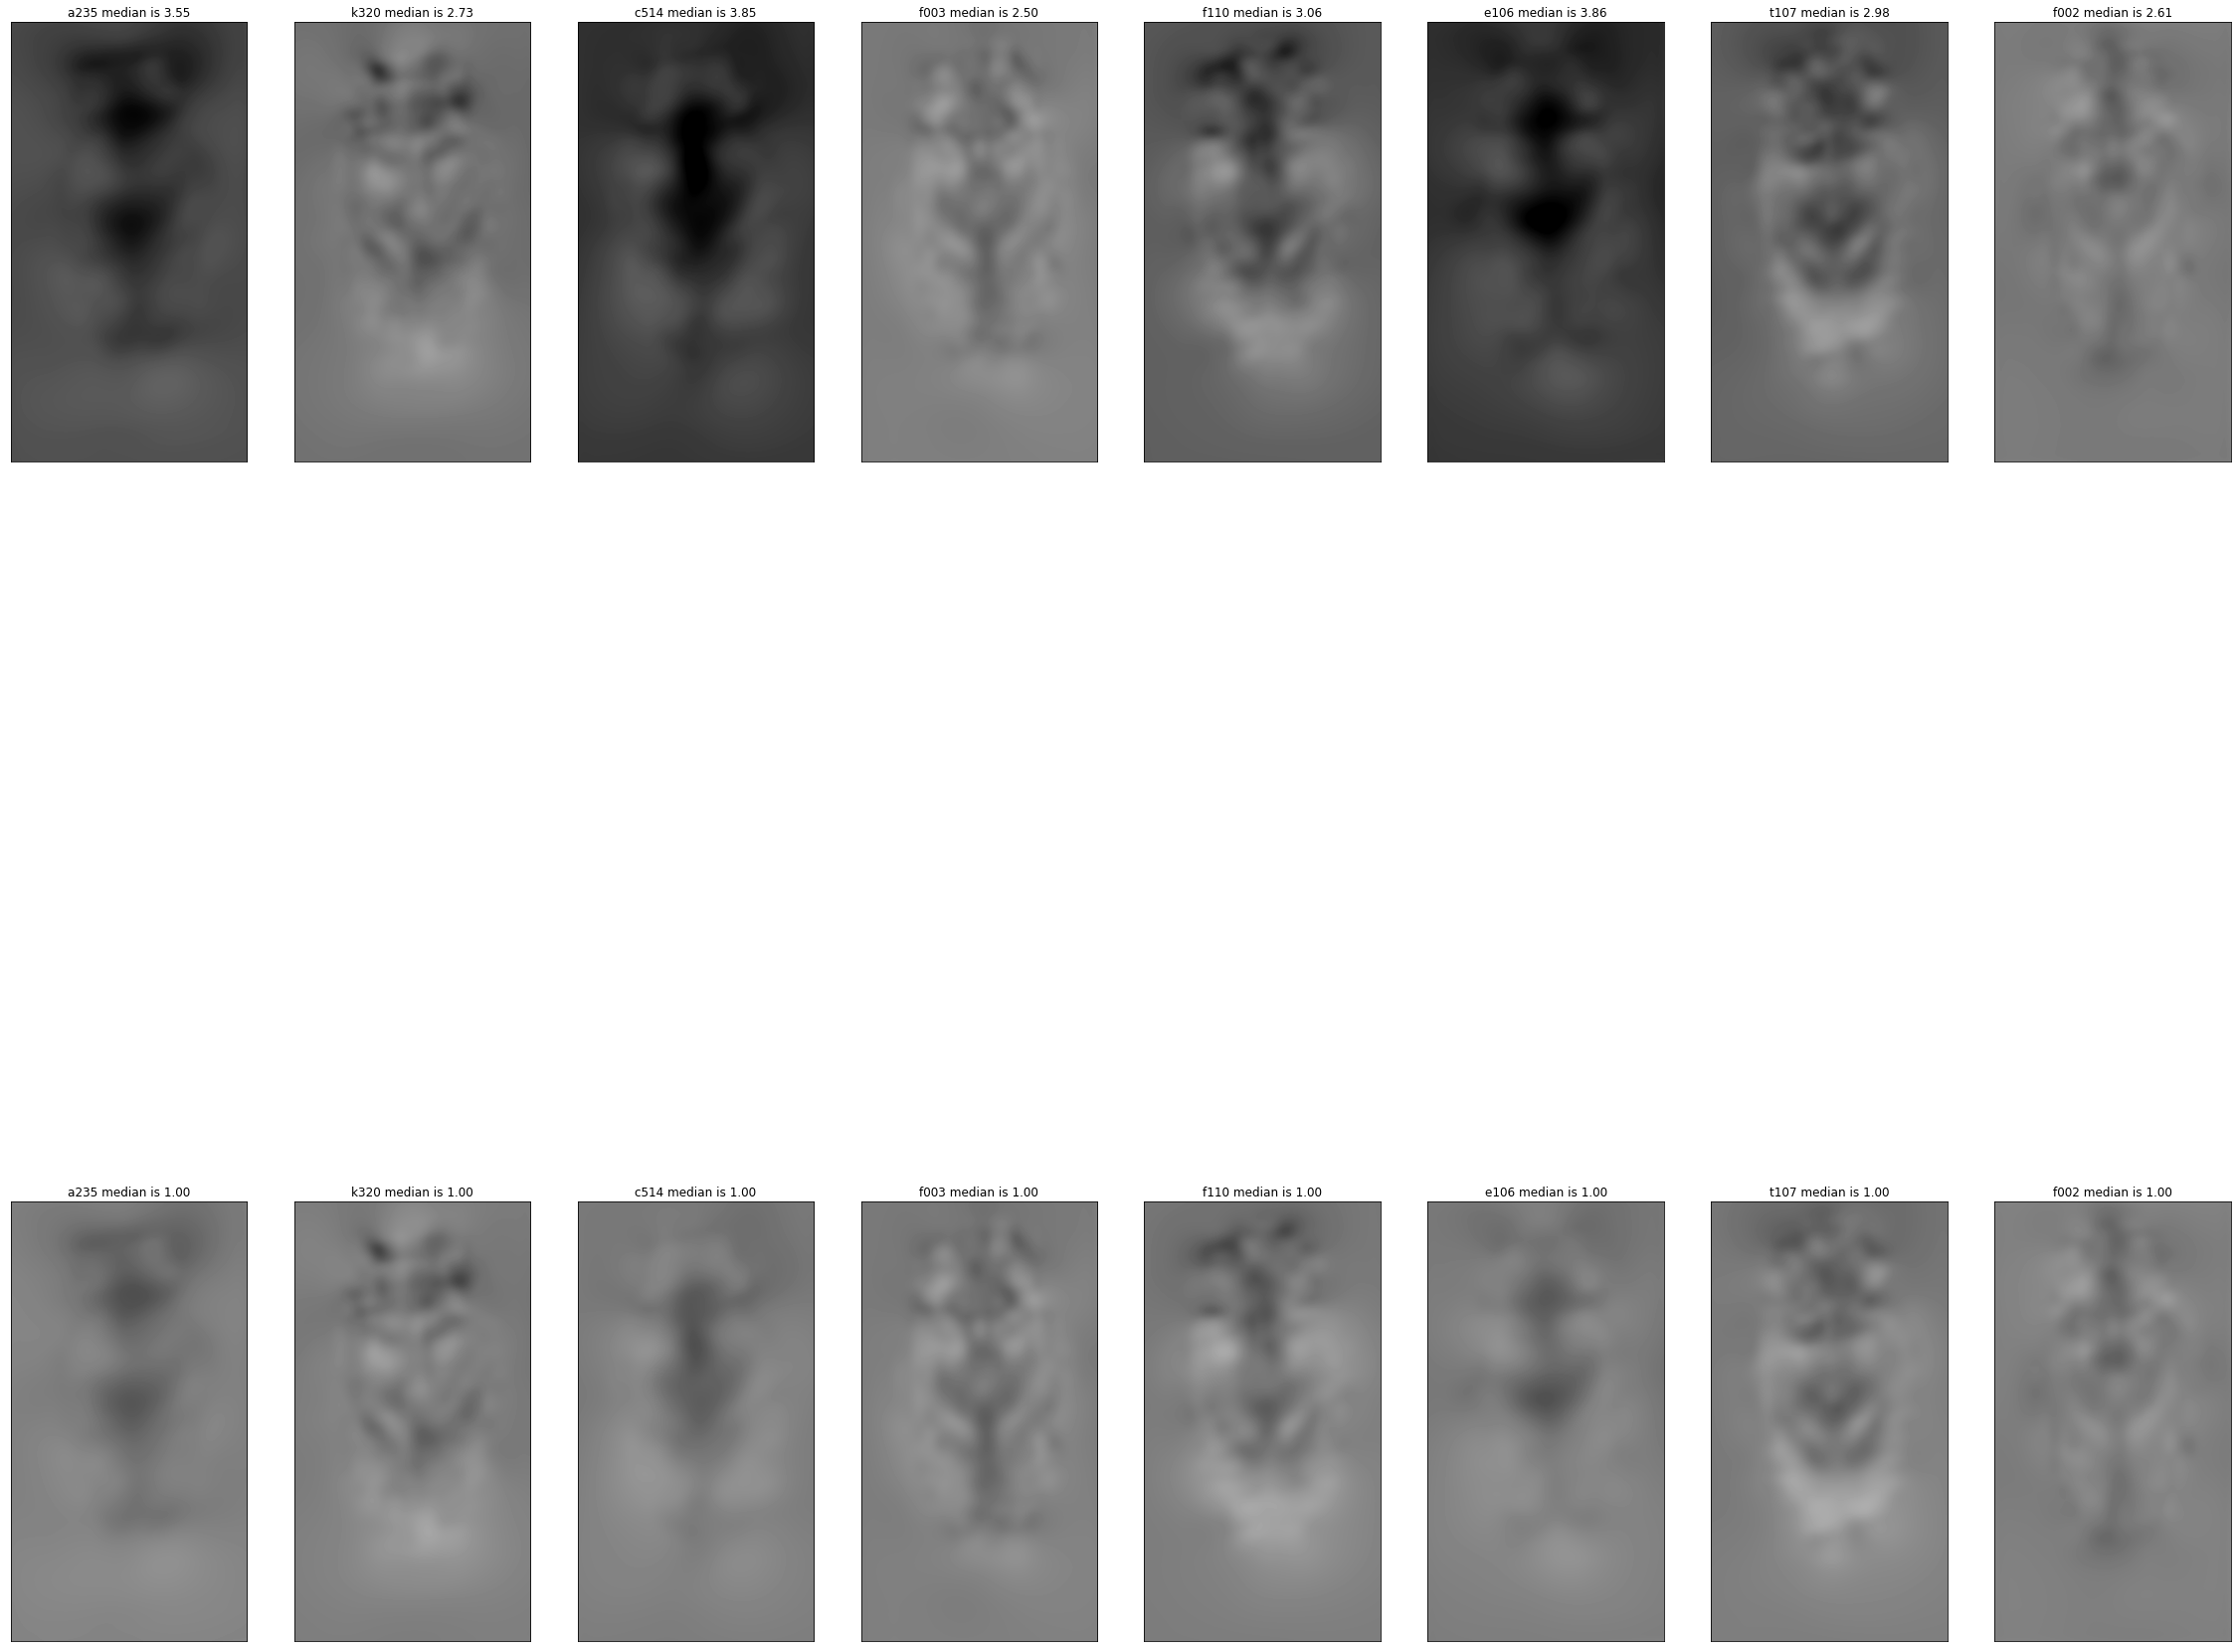

In [91]:
figure, axes = plt.subplots(nrows = 2, ncols = len(slice_array),figsize=(40,40))
for i in np.arange(0,len(slice_array)):
    print(i)
    axes[0,i].imshow(np.rot90(slice_array[i]),cmap='gray_r',vmin=0,vmax=5)
    axes[0,i].axes.set_xticks([])
    axes[0,i].axes.set_yticks([])
    axes[0,i].set_title('{} median is {:.2f}'.format(list_of_brains[i][:4],np.median(slice_array[i])))
    axes[1,i].imshow(np.rot90(np.divide(slice_array[i],np.median(slice_array[i]))),cmap='gray_r',vmin=0,vmax=2)
    axes[1,i].axes.set_xticks([])
    axes[1,i].axes.set_yticks([])
    axes[1,i].set_title('{} median is {:.2f}'.format(list_of_brains[i][:4],1))

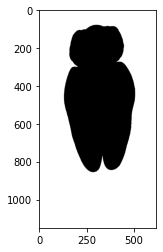

In [105]:
# TODO move mask to data folder
mask = np.divide(tif.imread('/home/emilyjanedennis/Desktop/for_registration_to_lightsheet/tiffs/PRA_mask.tif'),255)
mask_slice = mask[:,:,100]
plt.imshow(np.rot90(mask_slice),cmap='gray_r')

0
1
2
3
4
5
6
7


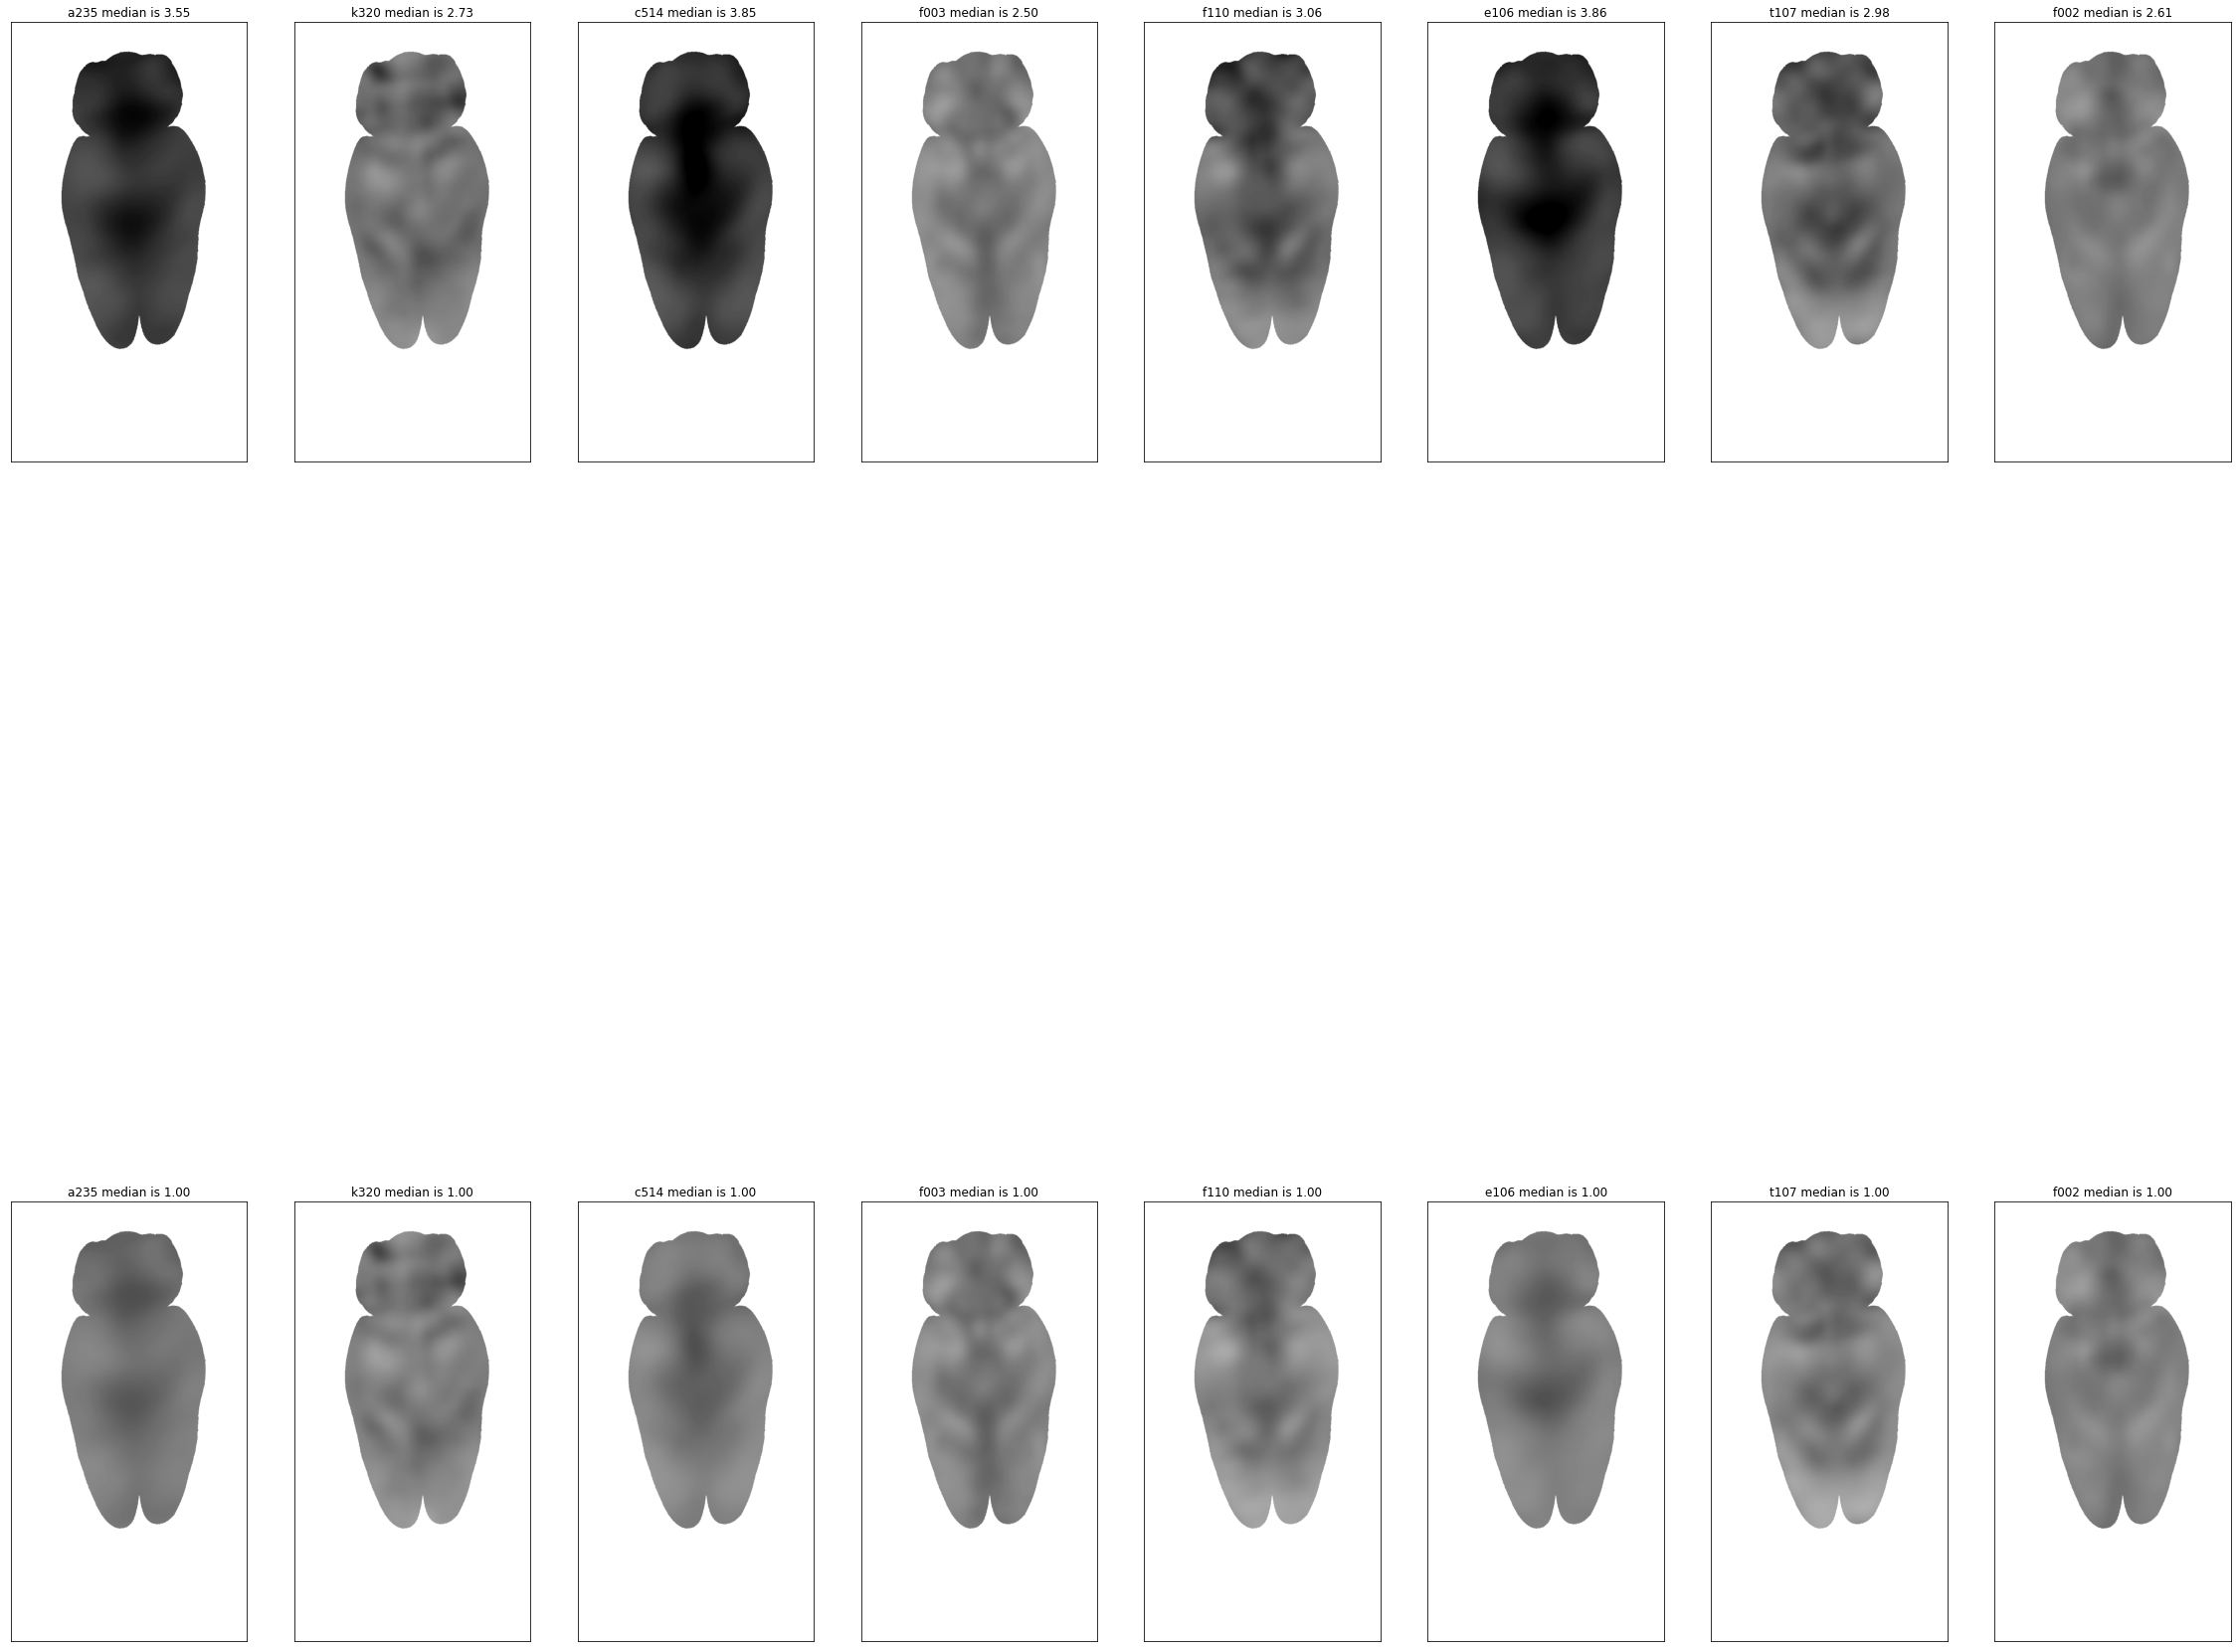

In [109]:
figure, axes = plt.subplots(nrows = 2, ncols = len(slice_array),figsize=(40,40))
for i in np.arange(0,len(slice_array)):
    print(i)
    axes[0,i].imshow(np.rot90(np.multiply(slice_array[i],mask_slice)),cmap='gray_r',vmin=0,vmax=5)
    axes[0,i].axes.set_xticks([])
    axes[0,i].axes.set_yticks([])
    axes[0,i].set_title('{} median is {:.2f}'.format(list_of_brains[i][:4],np.median(slice_array[i])))

    axes[1,i].imshow(np.rot90(np.multiply(np.divide(slice_array[i],np.median(slice_array[i])),mask_slice)),cmap='gray_r',vmin=0,vmax=2)
    axes[1,i].axes.set_xticks([])
    axes[1,i].axes.set_yticks([])
    axes[1,i].set_title('{} median is {:.2f}'.format(list_of_brains[i][:4],1))
    
plt.savefig('/home/emilyjanedennis/Desktop/jacplot.eps')